<a href="https://colab.research.google.com/github/MDRumman2019/PDS-11-25/blob/main/project2_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [182]:
df1=pd.read_csv('TT-1.csv')
df2=pd.read_csv('TT-2.csv')
df1.head()

,Reg. No.,Names,TT1 Marks
0,2017132035,Abdul Rahman,7.0
1,2018132012,Aminul Islam,7.0
2,2018132014,Anwar Hossain,12.0
3,2018132036,Ashraf Ali,14.0
4,2018132041,Imran Hossain,11.0


In [183]:
df2.head()

,Reg. No.,Names,TT2 Marks
0,2017132035,Abdul Rahman,5.5
1,2018132014,Aminul Islam,3.5
2,2018132036,Anwar Hossain,6.0
3,2018132041,Ashraf Ali,8.0
4,2018132043,Imran Hossain,8.0


In [184]:
df=pd.merge(df_tt1,df_tt2,on=["Reg. No."],how="inner")
df.head()

,Reg. No.,TT1 Marks,TT2 Marks
0,2017132035,7.0,5.5
1,2018132014,12.0,3.5
2,2018132036,14.0,6.0
3,2018132041,11.0,8.0
4,2018132043,14.0,8.0


In [185]:
df["Best_term_test_marks"]=df.loc[:,["TT1 Marks","TT2 Marks"]].max(axis=1)
df["Average_term_test_marks"]=df.loc[:,["TT1 Marks","TT2 Marks"]].mean(axis=1)

In [186]:
df.drop(["TT1 Marks","TT2 Marks"],axis=1,inplace=True)

In [187]:
df.head()

,Reg. No.,Best_term_test_marks,Average_term_test_marks
0,2017132035,7.0,6.25
1,2018132014,12.0,7.75
2,2018132036,14.0,10.00
3,2018132041,11.0,9.50
4,2018132043,14.0,11.00


In [188]:
at=pd.read_csv("Attendance.csv")
df=pd.merge(df,at,on=["Reg. No."],how="left")
df=df.drop("Names",axis=1)

In [200]:
df.head()

,Reg. No.,Best_term_test_marks,Average_term_test_marks,Attendance,Term Final Marks,Final Marks
0,2017132035,7.0,6.25,23,93,94.35
1,2018132014,12.0,7.75,30,85,97.25
2,2018132036,14.0,10.00,29,51,74.7
3,2018132041,11.0,9.50,32,77,95.4
4,2018132043,14.0,11.00,32,61,85.7


In [190]:
import random
df["Term Final Marks"]=np.array(random.randint(47,93) for i in range(50))
df["Final Marks"]=df["Term Final Marks"]*0.7+df["Attendance"]+df["Average_term_test_marks"]
df.head()

,Reg. No.,Best_term_test_marks,Average_term_test_marks,Attendance,Term Final Marks,Final Marks
0,2017132035,7.0,6.25,23,93,94.35
1,2018132014,12.0,7.75,30,85,97.25
2,2018132036,14.0,10.00,29,51,74.7
3,2018132041,11.0,9.50,32,77,95.4
4,2018132043,14.0,11.00,32,61,85.7


In [191]:
df.to_csv("final term test result.csv",index=False)


In [192]:
from google.colab import files
files.download("final term test result.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [193]:
X=df[["Average_term_test_marks","Final Marks"]].values
X

array([[6.25, 94.35],
       [7.75, 97.25],
       [10.0, 74.69999999999999],
       [9.5, 95.4],
       [11.0, 85.69999999999999],
       [11.0, 80.0],
       [10.25, 105.05],
       [8.5, 83.3],
       [11.75, 92.15],
       [8.75, 78.35],
       [12.5, 97.5],
       [9.0, 106.19999999999999],
       [6.75, 78.94999999999999],
       [14.75, 86.55],
       [15.75, 106.05],
       [12.0, 110.1],
       [12.0, 100.9],
       [11.75, 84.85],
       [14.0, 115.39999999999999],
       [8.25, 86.05],
       [9.5, 81.19999999999999],
       [13.0, 102.5],
       [7.25, 93.85],
       [11.25, 87.94999999999999],
       [3.0, 65.8],
       [15.25, 109.65],
       [12.0, 79.69999999999999],
       [11.5, 105.19999999999999],
       [11.5, 82.0],
       [14.0, 92.8],
       [6.0, 87.1],
       [8.0, 104.0],
       [12.0, 83.1],
       [13.25, 111.94999999999999],
       [13.5, 100.6],
       [13.0, 106.8],
       [9.5, 102.6],
       [16.0, 114.3],
       [9.5, 77.4],
       [13.25, 95.25],
   

In [194]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

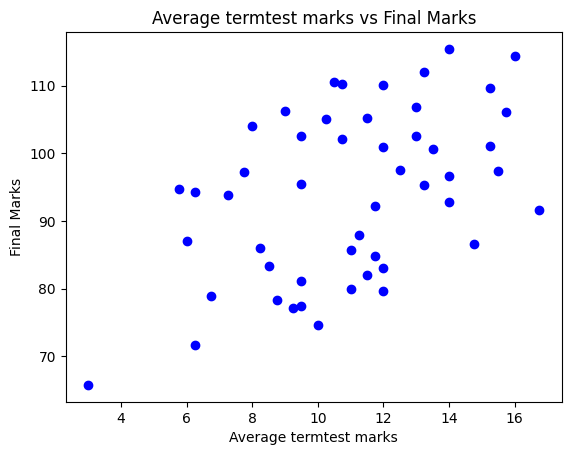

In [195]:
plt.scatter(x=X[:,0],y=X[:,1],color="blue")
plt.xlabel("Average termtest marks")
plt.ylabel("Final Marks")
plt.title("Average termtest marks vs Final Marks")
plt.show()

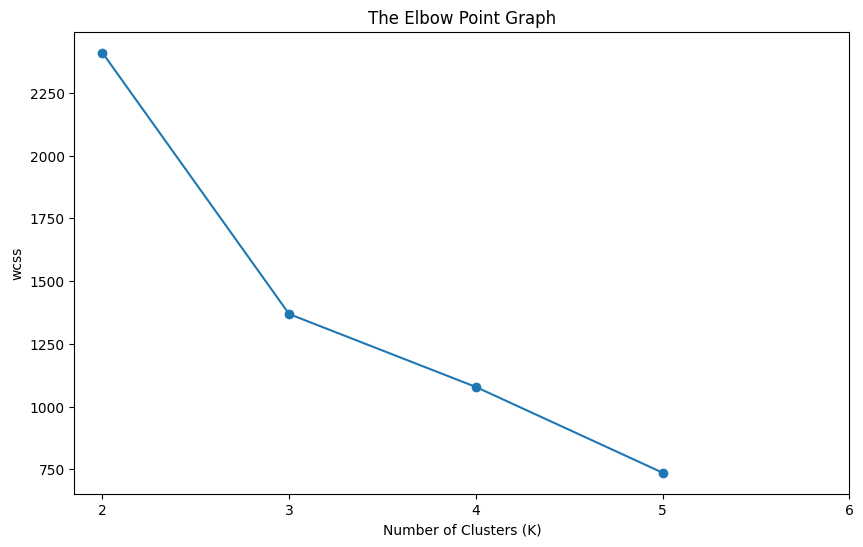

In [196]:
wcss=[]
for i in range(2,6):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(2,6), wcss)
plt.scatter(range(2,6), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.xticks([2,3,4,5,6])
plt.show()

In [197]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)
Y

array([1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0,
       1, 0, 1, 1, 0, 2], dtype=int32)

In [198]:
kmeans.cluster_centers_

array([[ 12.27631579, 106.58684211],
       [ 10.95833333,  92.05833333],
       [  9.07692308,  77.95384615]])

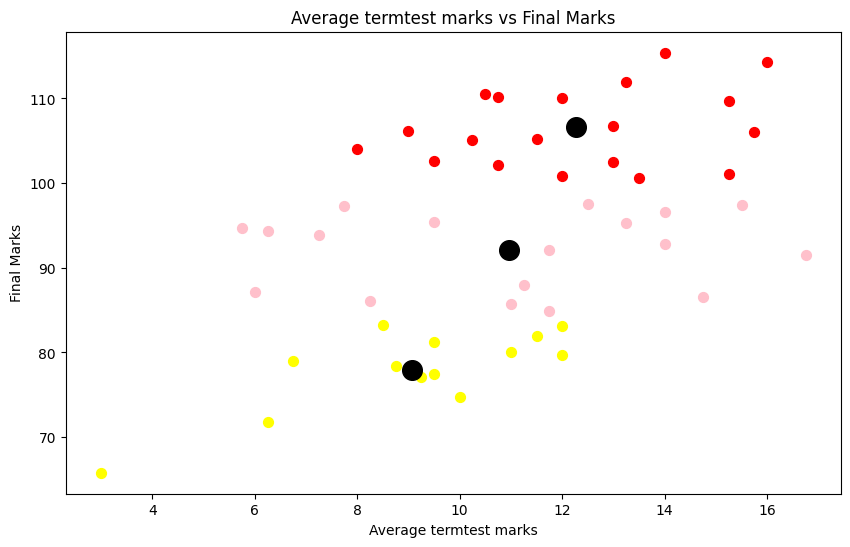

In [199]:

plt.figure(figsize=(10,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')
plt.xlabel("Average termtest marks")
plt.ylabel("Final Marks")
plt.title("Average termtest marks vs Final Marks")
plt.show()